In [1]:
# Importing Liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Case 1

In [2]:
# Importing cvs to DataFrame
df = pd.read_csv('/content/TFP.csv')

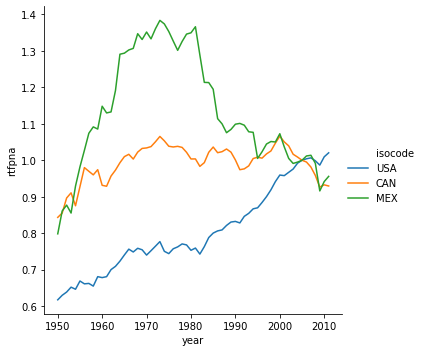

In [3]:
# Exploratory Analysis 
sns.relplot(x='year', y = 'rtfpna', data  = df, kind = 'line', hue = 'isocode', ci = None)
plt.show()

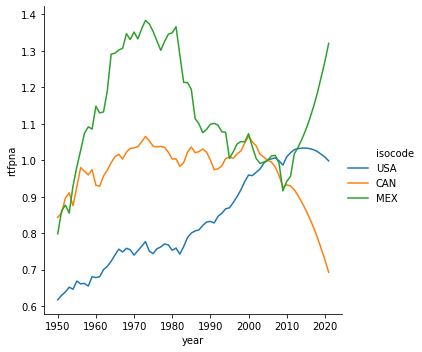

In [4]:
# Forecast 10 years
from scipy.interpolate import *

forecast_dates = pd.Series([2012,2013,2014,2015,2016,2017,2018,2018,2020,2021])

df_usa = df[df['isocode'] == 'USA'] 
df_mex = df[df['isocode'] == 'MEX']
df_can = df[df['isocode'] == 'CAN'] 

p_usa = np.polyfit(df_usa['year'],df_usa['rtfpna'], 4)
p_mex = np.polyfit(df_mex['year'],df_mex['rtfpna'], 4) 
p_can = np.polyfit(df_can['year'],df_can['rtfpna'], 4)

def polinomio (p, date):
  return(p[4] + p[3]*date + p[2]*date**2 + p[1]*date**3 + p[0]*date**4)


usa = pd.DataFrame( (['USA', date , polinomio(p_usa, date)] for date in forecast_dates), columns=('isocode', 'year', 'rtfpna'))
mex = pd.DataFrame( (['MEX', date , polinomio(p_mex, date)] for date in forecast_dates), columns=('isocode', 'year', 'rtfpna'))
can = pd.DataFrame( (['CAN', date , polinomio(p_can, date)] for date in forecast_dates), columns=('isocode', 'year', 'rtfpna'))

predictions = df.append(usa.append(mex.append(can)))

sns.relplot(x='year', y = 'rtfpna', data  = predictions, hue = 'isocode' , kind = 'line', ci = None)

plt.show()

In [5]:
# Can you think about another feature that could be helpful in explaining TFP series?

''' 
    I think that the     xr: Exchange rate, national currency/USD (market and estimated)
    could help explaing the TFP Series. Until 1982 the Mexican Exchance rate was low compared to USD, but after that the coin lost value 
    and impacted on the mesurements of income and productivity while in Canada it remainded approximately the same.
    
'''

' \n    I think that the     xr: Exchange rate, national currency/USD (market and estimated)\n    could help explaing the TFP Series. Until 1982 the Mexican Exchance rate was low compared to USD, but after that the coin lost value \n    and impacted on the mesurements of income and productivity while in Canada it remainded approximately the same.\n    \n'

# Case 2

In [6]:
df2 = pd.read_csv('/content/data_comexstat.csv')
df2 = df2.dropna()
print(df2.head())

         date product state        country    type   route    tons       usd
0  1997-01-01    corn    ES  United States  Import     Sea  44.045  113029.0
1  1997-01-01    corn    GO      Argentina  Import  Ground  54.000   36720.0
2  1997-01-01    corn    GO        Bolivia  Export  Ground   0.200     180.0
3  1997-01-01    corn    GO  United States  Export     Sea   3.488    5688.0
4  1997-01-01    corn    MG      Argentina  Import  Ground  27.000   18630.0


#1

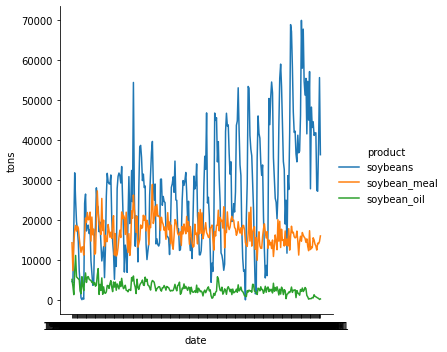

In [7]:
df_export = df2[df2['type'] == 'Export']

br_soy = df_export[df_export['product'] == 'soybeans']
br_meal = df_export[df_export['product'] == 'soybean_meal']
br_oil = df_export[df_export['product'] == 'soybean_oil']

br_prod = br_soy.append(br_meal.append(br_oil))

# Shows the monthly exports
sns.relplot(x='date', y = 'tons', data  = br_prod, kind = 'line', hue = 'product', ci = None)
plt.show()



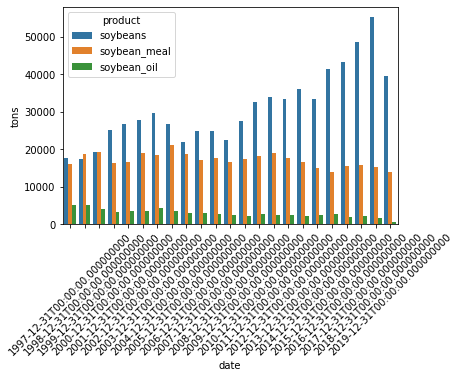

In [8]:
br_soy = df_export[df_export['product'] == 'soybeans']
br_meal = df_export[df_export['product'] == 'soybean_meal']
br_oil = df_export[df_export['product'] == 'soybean_oil']

def export(exports):
  exports.set_index('date', inplace=True)
  exports.index = pd.to_datetime(exports.index)
  return (exports.resample('1Y').mean())

# Calculates the yearly production of soybeans
br_prod_year_soy = export(br_soy)

for n in br_prod_year_soy['tons']:
  br_prod_year_soy['product'] = 'soybeans' 

# Calculates the yearly production of soybean_meal
br_prod_year_meal = export(br_meal)

for n in br_prod_year_meal['tons']:
  br_prod_year_meal['product'] = 'soybean_meal' 

# Calculates the yearly production of soybean_oil
br_prod_year_oil = export(br_oil)

for n in br_prod_year_oil['tons']:
  br_prod_year_oil['product'] = 'soybean_oil' 

# Combine all the products to a single df
br_prod_year = br_prod_year_soy.append(br_prod_year_meal.append(br_prod_year_oil))

# Shows the total tons of each product exported per year
chart = sns.barplot(x=br_prod_year.index, y = 'tons', data  = br_prod_year, hue = 'product')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

#2

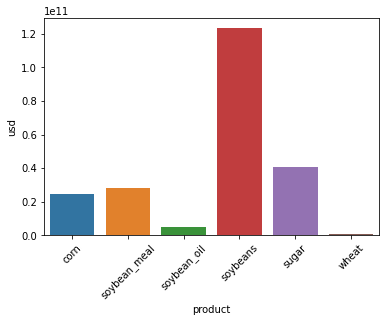

In [9]:
# Filter the national exports by date
df_export_5y = df_export[(df_export['date'] > '2014-12-31') & (df_export['date'] < '2020-01-01')]

# Group them to know the USD value
df_export_5y = df_export_5y.groupby(df_export_5y['product']).sum()

# Shows the total amount of money of each product exported in the last 5 years
chart = sns.barplot(x=df_export_5y .index, y = 'usd', data  = df_export_5y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

# The 3 most important products are Soybeans, Sugar and Soybean_meal.

#3

Corn exportations per route:
                tons           usd
route                             
Air     1.015261e+04  4.334926e+06
Ground  7.250953e+04  1.717586e+08
Other   2.660552e+05  4.413550e+07
River   5.869627e+06  9.663762e+08
Sea     1.383810e+08  2.326112e+10


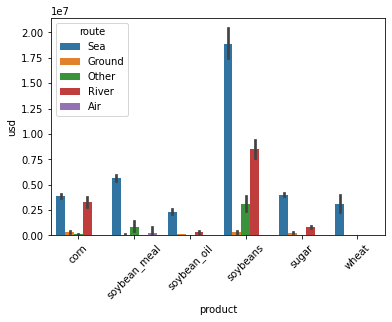

In [10]:
# Filter the national exports by date & product Corn
df_export_5y = df_export[(df_export['date'] > '2014-12-31') & (df_export['date'] < '2020-01-01')]
df_export_5y_corn = df_export_5y[df_export_5y['product'] == 'corn']

# Group them by Route and sum the TONS and USD values
df_export_5y_corn_route = df_export_5y_corn.groupby(df_export_5y_corn['route']).sum()

print('Corn exportations per route:')
print(df_export_5y_corn_route)


# Shows the total USD exported of each product per Route in the past years
chart = sns.barplot(x='product', y = 'usd', data  = df_export_5y, hue = 'route')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

# The main routes that Brazil has been exporting corn in the past years are mainly by Sea, followed by River and Ground.

# The products have about the same route distribuition behavior with few exceptions:
# - Corn is the only product that has aproxemetly the same volume of transportation between 'Sea' and 'River'.
# - Soybeans_meal is the only product that has 'Other' as the 2nd biggest transportation mean.
# - Wheat is not transported by River.

#4

In [12]:
# Filter the national exports by date & product Corn + Sugar
df_export_3y = df_export[(df_export['date'] > '2016-12-31') & (df_export['date'] < '2020-01-01')]
df_export_3y_corn_sugar = df_export_3y[(df_export_3y['product'] == 'corn') | (df_export_3y['product'] == 'sugar')]

# Group them by Country and sum the TONS and USD values
df_countries = df_export_3y_corn_sugar.groupby(df_export_3y_corn_sugar['country']).sum()

# Sort the countries by USD exported in the past 3 years 
df_countries = df_countries.sort_values(by = 'usd', ascending= False)

print(df_countries.head())

# Comparing the Corn + Sugar USD exportations, the most important partners are:
#  1 - Iran
#  2 - Japan
#  3 - Vietnam

                    tons           usd
country                               
Iran        1.785774e+07  3.302428e+09
Bangladesh  9.560076e+06  2.591054e+09
Algeria     8.315540e+06  2.441462e+09
Egypt       1.142502e+07  2.385649e+09
Malaysia    7.220061e+06  1.735365e+09


#5

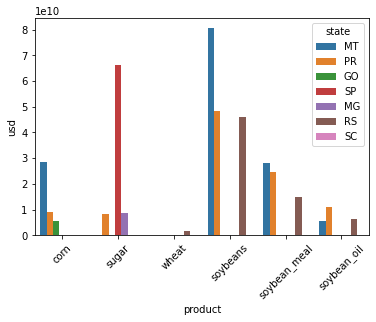

In [46]:
corn = ['corn','corn','corn']
sugar = ['sugar','sugar','sugar']
wheat = ['wheat','wheat','wheat']
soybeans = ['soybeans','soybeans','soybeans']
soybean_meal = ['soybean_meal','soybean_meal','soybean_meal']
soybean_oil = ['soybean_oil','soybean_oil','soybean_oil']

df_export_corn = df_export[df_export['product'] == 'corn']
df_export_wheat = df_export[df_export['product'] == 'wheat']
df_export_soybeans = df_export[df_export['product'] == 'soybeans']
df_export_soybean_meal = df_export[df_export['product'] == 'soybean_meal']
df_export_soybean_oil = df_export[df_export['product'] == 'soybean_oil']
df_export_sugar = df_export[df_export['product'] == 'sugar']


# Group the df by state, summing the values of USD for future reference and sort them into descending order.
def top_states(df, product_list):
  df = df.groupby(df['state']).sum().sort_values(by = 'usd', ascending= False).head(3)
  df['product'] = product_list
  return(df)
 

# Calculate the states per product
df_export_corn = top_states(df_export_corn, corn)
df_export_sugar = top_states(df_export_sugar, sugar)
df_export_wheat = top_states(df_export_wheat, wheat)
df_export_soybeans = top_states(df_export_soybeans, soybeans)
df_export_soybean_meal = top_states(df_export_soybean_meal, soybean_meal)
df_export_soybean_oil = top_states(df_export_soybean_oil,soybean_oil)

df_states = df_export_corn.append(df_export_sugar.append(df_export_wheat.append(df_export_soybeans.append(df_export_soybean_meal.append(df_export_soybean_oil)))))

# Show the USD exported per state per product
chart = sns.barplot(x='product', y = 'usd', data  = df_states, hue = df_states.index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

# The mains states are:
#
#           Corn  Sugar   Wheat   Soybeans  Soybeans_meal   Soybeans_oil
# State 1°  MT    SP      RS      MT        MT              PR
# State 2°  PR    MG      PR      PR        PR              RS
# State 3°  GO    PR      SC      RS        RS              MT

#6
 Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.